# Part 1:引入工具

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import pandas as pd
import os
import cv2

# Part 2: 輸入資料

### Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 設定資料路徑
# training data path
trcloudy='/content/drive/MyDrive/master1_class/image_process_class/HW/HW2_true/weather_image/train/cloudy/'
trrain='/content/drive/MyDrive/master1_class/image_process_class/HW/HW2_true/weather_image/train/rain/'
trshine='/content/drive/MyDrive/master1_class/image_process_class/HW/HW2_true/weather_image/train/shine/'
trsunrise='/content/drive/MyDrive/master1_class/image_process_class/HW/HW2_true/weather_image/train/sunrise/'

# testing data path
testpath='/content/drive/MyDrive/master1_class/image_process_class/HW/HW2_true/weather_image/test/'

In [4]:
# 顯示資料筆數
print('train cloudy length: ',len(os.listdir(trcloudy)))
print('train rain length: ',len(os.listdir(trrain)))
print('train shine length: ',len(os.listdir(trshine)))
print('train sunrise length: ',len(os.listdir(trsunrise)))
print('\n')
print('test data length: ',len(os.listdir(testpath)))

train cloudy length:  280
train rain length:  199
train shine length:  232
train sunrise length:  337


test data length:  75


### convert image data to numpy

In [5]:
# convert the train data to numpy
tr_label=list()
tr_data=np.empty(shape=(1048,300,300,3))
x=0
for i in range(len(os.listdir(trcloudy))):
  f=os.listdir(trcloudy)[i]
  img=cv2.imread(trcloudy+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(0)
  x+=1
for i in range(len(os.listdir(trrain))):
  f=os.listdir(trrain)[i]
  img=cv2.imread(trrain+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(1)
  x+=1
for i in range(len(os.listdir(trshine))):
  f=os.listdir(trshine)[i]
  img=cv2.imread(trshine+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(2)
  x+=1
for i in range(len(os.listdir(trsunrise))):
  f=os.listdir(trsunrise)[i]
  img=cv2.imread(trsunrise+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(3)
  x+=1

tr_label=np.array(tr_label)

In [6]:
# convert the test data to numpy
te_filename=list()
te_data=np.empty(shape=(75,300,300,3))
for i in range(len(os.listdir(testpath))):
  f=os.listdir(testpath)[i]
  te_filename.append(f)
  img=cv2.imread(testpath+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  te_data[i]=img

In [7]:
# show data size
print('train data size:',tr_data.shape)
print('train label size:',len(tr_label))
print('test data size:',te_data.shape)

train data size: (1048, 300, 300, 3)
train label size: 1048
test data size: (75, 300, 300, 3)


### shuffle

In [8]:
# on-hot label
from tensorflow.keras.utils import to_categorical
tr_label=to_categorical(tr_label)

# 打亂資料順序
from sklearn.utils import shuffle
tr_data,tr_label=shuffle(tr_data,tr_label,random_state=0)

### train_validation data split

In [9]:
# train_validation data split
#val_data數量固定262個
train_data=tr_data[0:786]
val_data=tr_data[786:]
train_label=tr_label[0:786]
val_label=tr_label[786:]
print('train data size: ',train_data.shape)
print('validation data size: ',val_data.shape)
print('train label size: ',train_label.shape)
print('validation label size: ',val_label.shape)

train data size:  (786, 300, 300, 3)
validation data size:  (262, 300, 300, 3)
train label size:  (786, 4)
validation label size:  (262, 4)


### Data augmentation

In [25]:
# Data augmentation

###################### to do ######################
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)
augmented_data = datagen.flow(train_data, train_label, batch_size = 32)

# Part 3：建立 CNN 模型

In [26]:
# Build CNN model

###################### to do ######################


model = models.Sequential([
    layers.Conv2D(16, (3, 3), padding = 'same', activation = 'relu', input_shape=(300, 300, 3), kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.Conv2D(16, (3, 3), padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.MaxPooling2D((2, 2)),

    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.MaxPooling2D((2, 2)),

    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.MaxPooling2D((3, 3)),

    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.MaxPooling2D((2, 2)),

    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.Conv2D(256, (3, 3), padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.MaxPooling2D((2, 2)),

    layers.Dropout(0.5),
    layers.Flatten(),
    #layers.BatchNormalization(),
    layers.Dense(1024, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.Dropout(0.3),
    layers.Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l=0.01)),
    layers.Dropout(0.3),
    layers.Dense(4, activation = 'softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 300, 300, 16)      448       
                                                                 
 conv2d_35 (Conv2D)          (None, 300, 300, 16)      2320      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 150, 150, 16)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_16 (Ba  (None, 150, 150, 16)      64        
 tchNormalization)                                               
                                                                 
 conv2d_36 (Conv2D)          (None, 150, 150, 32)      4640      
                                                                 
 conv2d_37 (Conv2D)          (None, 150, 150, 32)     

In [14]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.7 MB/s eta 0:00:00


In [27]:
# Build compile model
###################### to do ######################
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import math
import tensorflow_addons as tfa



def lr_decay(epoch):
    initial_lr = 0.001
    decay_factor = 0.5
    decay_epochs = 20
    lrate = initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / decay_epochs))
    return lrate
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 15)

lr_scheduler = LearningRateScheduler(lr_decay)

model.compile(optimizer = tfa.optimizers.RectifiedAdam(), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Training model

###################### to do ######################
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/master1_class/image_process_class/HW/HW2_true/weather_image/fashion_mnist_model.h5", verbose=1, save_best_only=True)
history = model.fit(augmented_data, validation_data=(val_data, val_label), epochs=500, callbacks=[early_stopping, lr_scheduler, checkpointer])

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 30.2079 - accuracy: 0.3817
Epoch 1: val_loss improved from inf to 29.85313, saving model to /content/drive/MyDrive/master1_class/image_process_class/HW/HW2_true/weather_image/fashion_mnist_model.h5
25/25 [==============================] - 33s 1s/step - loss: 30.2079 - accuracy: 0.3817 - val_loss: 29.8531 - val_accuracy: 0.2939 - lr: 0.0010
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 28.6677 - accuracy: 0.7201
Epoch 2: val_loss improved from 29.85313 to 28.77701, saving model to /content/drive/MyDrive/master1_class/image_process_class/HW/HW2_true/weather_image/fashion_mnist_model.h5
25/25 [==============================] - 28s 1s/step - loss: 28.6677 - accuracy: 0.7201 - val_loss: 28.7770 - val_accuracy: 0.2939 - lr: 0.0010
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 27.1442 - accuracy: 0.8282
Epoch 3: val_loss improved from 28.77701 to 27.28808, saving model to /conten

# Part 4:評估模型

### loss curve & accuracy curve

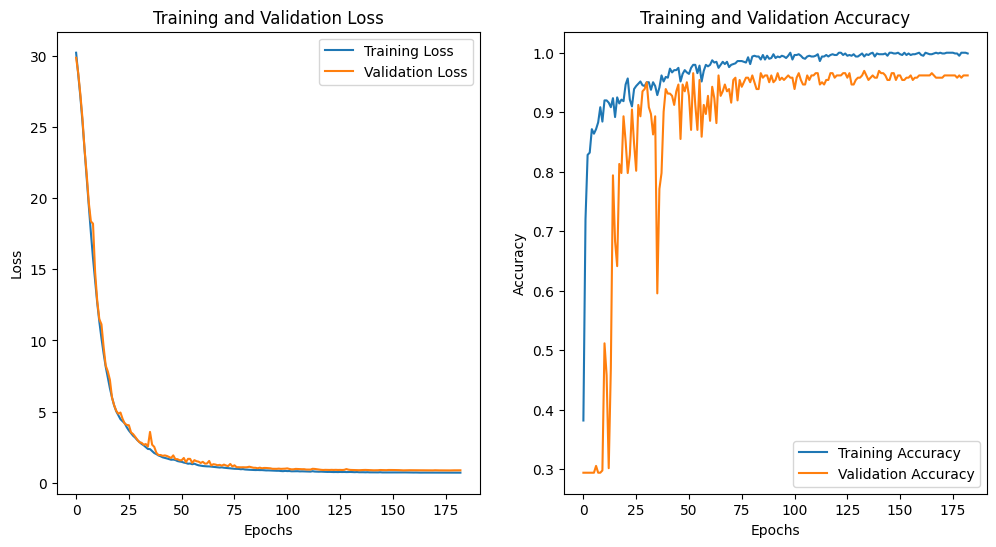

In [29]:
# plot loss curve and accuracy curve

###################### to do ######################
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

#plt.tight_layout()
plt.show()

### confusion matrix

9/9 [==============================] - 1s 43ms/step


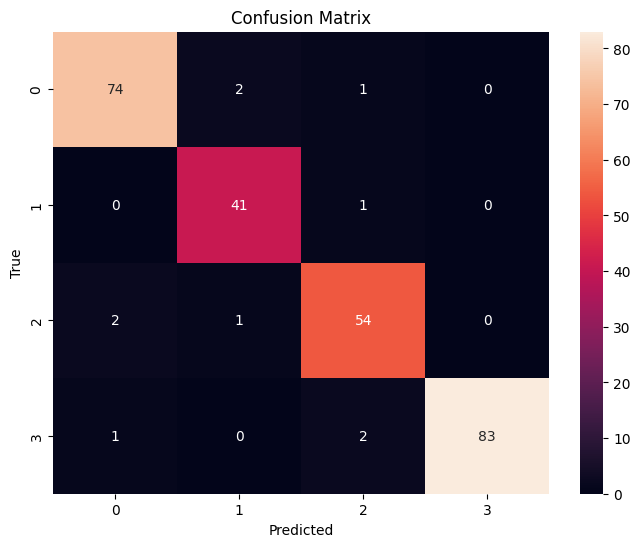

In [30]:
# plot confusion matrix

###################### to do ######################
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


predicted_labels = model.predict(val_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

val_label_aug = np.argmax(val_label, axis=1)
confusion_mat = confusion_matrix(val_label_aug, predicted_labels)

class_labels = ['0', '1', '2', '3']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot = True, fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Part 5:將輸出轉成 CSV 檔

In [31]:
import pandas as pd

In [32]:
prediction = model.predict(te_data)
prediction = np.argmax(prediction,axis=1)
prediction

3/3 [==============================] - 0s 83ms/step


array([2, 1, 3, 2, 0, 0, 2, 3, 3, 0, 1, 0, 0, 3, 3, 3, 0, 2, 3, 2, 0, 3,
       1, 1, 3, 3, 0, 3, 0, 0, 1, 2, 0, 2, 3, 3, 2, 2, 3, 0, 2, 1, 1, 2,
       0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 2, 1, 3, 3, 0, 0, 2, 3, 1, 1, 0, 3,
       2, 3, 1, 0, 1, 0, 2, 3, 1])

In [33]:
test_label=pd.DataFrame()
test_label['image_id']=te_filename
test_label['labels']=prediction
test_label=test_label.sort_values(by='image_id')
test_label.to_csv('/content/drive/MyDrive/master1_class/image_process_class/HW/HW2_true/weather_image/predict_label.csv',index=False) #結果轉csv檔